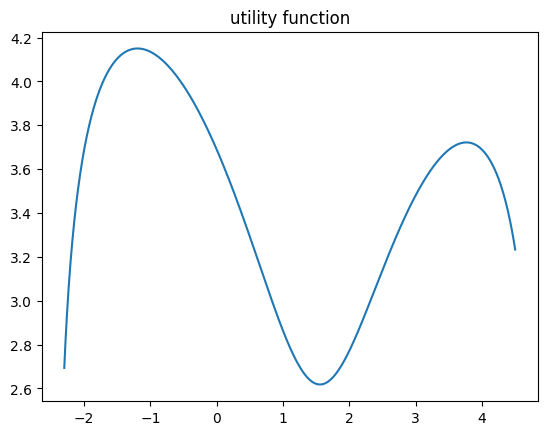

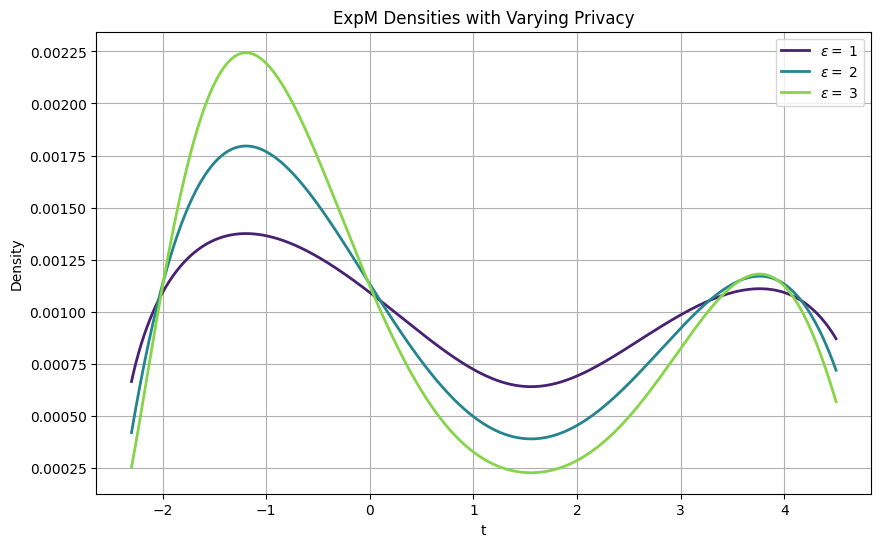

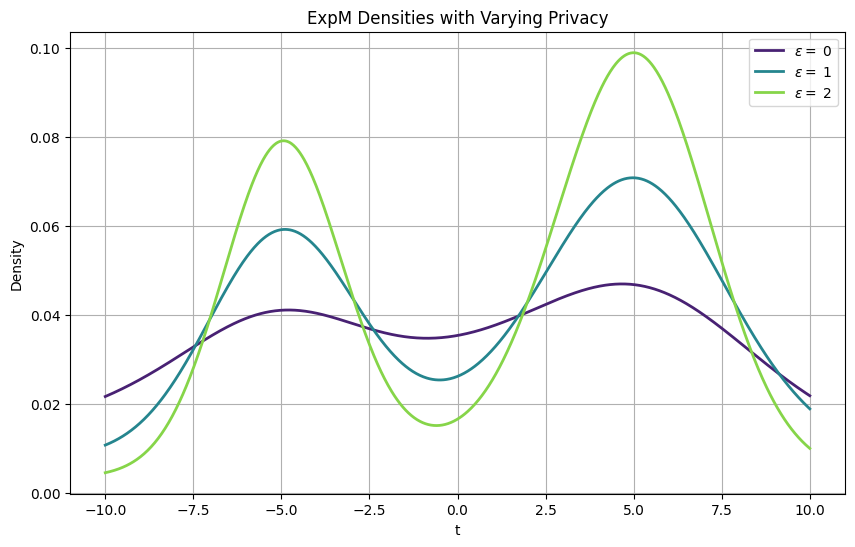

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# color = sns.set_palette("viridis")  # Set seaborn's Viridis palette
colors = sns.color_palette('viridis', 10)
colors
x = np.linspace(-2.3,4.5, 1000)
shape = list(map(lambda t: np.log(-(t+2.)*t*(t-3.5)*(t-4) +40), x ))
plt.plot(x,shape)
plt.title('utility function')
plt.show()

def f(shape, eps): 
    num = list(map( lambda t: np.exp(eps*t/2), shape))
    z = sum(num)
    return num/z

plt.figure(figsize=(10, 6))
# sns.set_palette("viridis")  # Set seaborn's Viridis palette
c = colors[0], colors[4], colors[-2]
for i, eps in enumerate([1, 2, 3]):
    plt.plot(x, f(shape, eps), label=fr"$\varepsilon =$ {eps}", linewidth=2, color=c[i])
    
plt.xlabel("t")
plt.ylabel("Density")
plt.title("ExpM Densities with Varying Privacy")
plt.legend()
plt.grid(True)
plt.show()
# Generate data to make toy densities for epsilon = 1,2,3
## epsilon = 1 has least variance, epsilon = 3 most.  

np.random.seed(42)  # For reproducibility
# Plot the probability density in bright green from Viridis palette
plt.figure(figsize=(10, 6))
# sns.set_palette("viridis")  # Set seaborn's Viridis palette
c = colors[0], colors[4], colors[-2]
## data for widest variance 
for i, (d1,d2,d3) in enumerate([[800, 120, 80], [300, 265, 185], [200, 500, 300 ] ]):
    data_mode1 = np.random.normal(loc=0, scale=10, size=d1)
    data_mode2 = np.random.normal(loc=5, scale=1.5, size=d2)
    data_mode3 = np.random.normal(loc=-5, scale=0.5, size=d3)

    data = np.concatenate([data_mode1, data_mode2, data_mode3])# Concatenate the data from the three modes
    kde = gaussian_kde(data) # Estimate the kernel density of the data to create a smooth probability density

    # Range of x-values for plotting
    x_values = np.linspace(- 10,10, 1000)
    # Evaluate the density at the given x-values
    y_values = kde(x_values)

    plt.plot(x_values, y_values, label=fr"$\varepsilon =$ {i}", linewidth=2, color=c[i])


plt.xlabel("t")
plt.ylabel("Density")
plt.title("ExpM Densities with Varying Privacy")
plt.legend()
plt.grid(True)
plt.show()
